# ☀ ☁ **ML Weather Forecast using Australian Weather Data**  ☁ 🌩

Importing standard libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## **Metadata:** 

Date - The date of observation (a Date object).

Location - The common name of the location of the weather station.

MinTemp - The minimum temperature in degrees celsius.

MaxTemp - The maximum temperature in degrees celsius.

Rainfall - The amount of rainfall recorded for the day in mm.

Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am.

Sunshine - The number of hours of bright sunshine in the day.

WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight.

WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight.

Temp9am - Temperature (degrees C) at 9am.

RelHumid9am - Relative humidity (percent) at 9am.

Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.

WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am.

Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am.

Temp3pm - Temperature (degrees C) at 3pm.

RelHumid3pm - Relative humidity (percent) at 3pm.

Cloud3pm - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values.

WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm.

Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm.

ChangeTemp - Change in temperature.

ChangeTempDir - Direction of change in temperature.

ChangeTempMag - Magnitude of change in temperature.

ChangeWindDirect - Direction of wind change.

MaxWindPeriod - Period of maximum wind.

RainToday - Integer: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0.

TempRange - Difference between minimum and maximum temperatures (degrees C) in the 24 hours to 9am.

PressureChange - Change in pressure.

RISK_MM - The amount of rain. A kind of measure of the "risk".

RainTomorrow - The target variable. Did it rain tomorrow?

Importing Data:

In [ ]:
df = pd.read_csv("weatherAUS.csv", skipinitialspace = True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.shape

(145460, 23)

## **Q1 - Preprocess the data, remove the attributes which were are not useful to predict rain. Also, remove rows with at least one missing value for each of them.**

In [ ]:
#Checking the number of null values per attribute:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
# We know that rain is more likey to fall in some months than others. Here we extract "month" from the "Date" column. 

df['Date'] = pd.to_datetime(df['Date']) # Consider all instances in "date" column as datetime objects

df['Month'] = df['Date'].dt.month #Extracting the month for every instance

df.drop('Date', axis=1, inplace = True) # Dropping original date column

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12


Removing attributes:
* Location and date are dropped as they may be relatively irrelevant to the model
* Evaporation, Sunshine, Cloud9am, and Cloud3pm are all useful in predicting rain. 
* However these columns have very large numbers of missing values. 
* Since we have to delete rows with at least 1 missing value later, in order to preserve more data, we drop these columns.

In [ ]:
# Dropping the aformentioned columns: 

df = df.drop(columns=['Location', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12


In [ ]:
# Dropping rows where there is at least 1 null value

df = df.dropna(how='any')
df.shape

(112925, 18)

In [ ]:
# Identifying the categorical vs. numerical variables for transforming the data:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 145458
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        112925 non-null  float64
 1   MaxTemp        112925 non-null  float64
 2   Rainfall       112925 non-null  float64
 3   WindGustDir    112925 non-null  object 
 4   WindGustSpeed  112925 non-null  float64
 5   WindDir9am     112925 non-null  object 
 6   WindDir3pm     112925 non-null  object 
 7   WindSpeed9am   112925 non-null  float64
 8   WindSpeed3pm   112925 non-null  float64
 9   Humidity9am    112925 non-null  float64
 10  Humidity3pm    112925 non-null  float64
 11  Pressure9am    112925 non-null  float64
 12  Pressure3pm    112925 non-null  float64
 13  Temp9am        112925 non-null  float64
 14  Temp3pm        112925 non-null  float64
 15  RainToday      112925 non-null  object 
 16  RainTomorrow   112925 non-null  object 
 17  Month          112925 non-nul

In [ ]:
# Grouping attributes depending on whether the column is numerical/categorical:

num_columns = df.select_dtypes(include=["float64", "int64"])
cat_columns = df.select_dtypes(exclude=["float64"])

Encoding the categorical values for our ML Model:
* In order for most ML models to function efficiently, they require **categorical** attributes to inputted as **numeric** data
* Here we use **LabelEncoder** to transform our categorical values into normalized numerical labels


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # Creating an instance of LabelEncoder

for i in cat_columns:
    df[i] = le.fit_transform(df[i].astype(str)) # Applying LabelEncoder to every categorical column 
    
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,3
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,3
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,3
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,3
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,3


In [ ]:
# Creating a copy of the original dataset for comparison later on:
dfOriginal = df

##**Q2 - Calculate  the  Variance  Inflation  Factor  (VIF)  value.**  

**VIF  is  a  number  that determines whether a variable has multicollinearity or not (starts from 1, and it has  no  upper  limit; the larger the number, the more multicollinearity the attribute suffers from).**

* Multicollinearity refers to an issue that arises in data wherein mutltiple independent variables/ attributes are highly intercorrelated

* A variable's VIF score helps us in identifying whether or not a variable has multicollinearity.

* We can observe multicollinearity amongst variables using a heatmap:

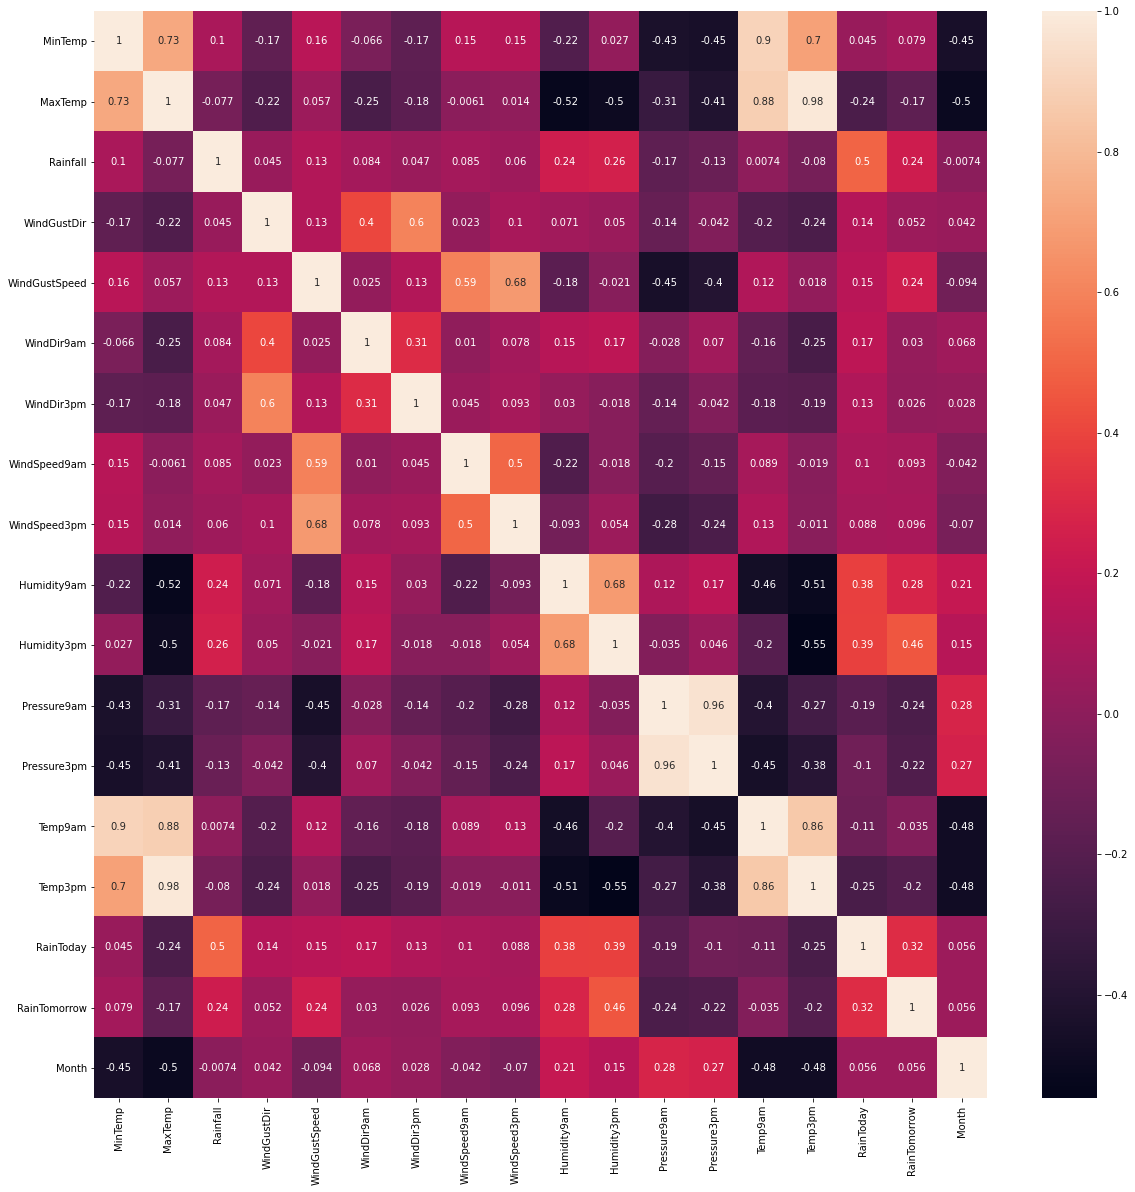

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

Insights:

There are quite a few highly correlated pairs, namely:
* Pressure9am and Pressure3pm
* Temp9am and Temp3pm
* Mintemp and Maxtemp
* Humidity9am and Humidity3pm
* WindSpeed3pm and WindSpeed9am

Before moving forward, we must check the exact degree to which these pairs are correlated. This can be done by calculating their VIF values:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating an empty dataframe called vif
vif = pd.DataFrame()

# Calculating VIF for every column of our data:
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif['variable'] = df.columns
vif.sort_values('VIF', ascending=False)

,VIF,variable
11,473897.711434,Pressure9am
12,471497.649090,Pressure3pm
14,603.799425,Temp3pm
1,556.010444,MaxTemp
13,185.938074,Temp9am
9,57.342224,Humidity9am
10,47.567172,Humidity3pm
0,44.319869,MinTemp
4,27.053620,WindGustSpeed
8,12.852613,WindSpeed3pm


The results confirm the findings from the heatmap: all pairs that were found to be highly correlated have the highest VIF scores

## **Q3 - Remove multicollinearities by creating new features.**

## **Find the features that have paired values and create the new feature which is the difference value between those pairs.**

In [ ]:
df['TempNew'] = df['Temp3pm'] - df['Temp9am']
df['PressureNew'] = df['Pressure3pm'] - df['Pressure9am']
df['MinMaxTempNew'] = df['MaxTemp'] - df['MinTemp']
df['HumidityNew'] = df['Humidity3pm'] - df['Humidity9am']
df['WindSpeedNew'] = df['WindSpeed3pm'] - df['WindSpeed9am']

df = df.drop(columns=['Temp3pm', 'Temp9am', 'Pressure3pm', 'Pressure9am', 'MaxTemp', 'MinTemp','Humidity3pm', 'Humidity9am', 'WindSpeed3pm', 'WindSpeed9am'], axis=1)

df.head()

,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Month,TempNew,PressureNew,MinMaxTempNew,HumidityNew,WindSpeedNew
0,0.6,13,44.0,13,14,0,0,3,4.9,-0.6,9.5,-49.0,4.0
1,0.0,14,44.0,6,15,0,0,3,7.1,-2.8,17.7,-19.0,18.0
2,0.0,15,46.0,13,15,0,0,3,2.2,1.1,12.8,-8.0,7.0
3,0.0,4,24.0,9,0,0,0,3,8.4,-4.8,18.8,-29.0,-2.0
4,1.0,13,41.0,1,7,0,0,3,11.9,-4.8,14.8,-49.0,13.0


## **Q4 - Remove features that have a VIF value above 5.**

In [ ]:
# Creating an new empty dataframe called vifNew to check the effects of combining attributes to reduce multicollinearity
vifNew = pd.DataFrame()

# Calculating VIF for every column of our data:
vifNew['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vifNew['variable'] = df.columns
vifNew.sort_values('VIF', ascending=False)

,VIF,variable
10,15.650344,MinMaxTempNew
8,14.402012,TempNew
2,8.000011,WindGustSpeed
1,6.471862,WindGustDir
4,6.389926,WindDir3pm
11,5.663881,HumidityNew
3,4.126146,WindDir9am
9,3.777550,PressureNew
7,3.295898,Month
5,2.046340,RainToday


In [ ]:
# Dropping the remaining columns with high VIF values (that we cannot substitute with differences)
df = df.drop(columns=['MinMaxTempNew', 'TempNew', 'WindGustSpeed', 'WindGustDir', 'WindDir3pm', 'HumidityNew'], axis=1)
df.head()

,Rainfall,WindDir9am,RainToday,RainTomorrow,Month,PressureNew,WindSpeedNew
0,0.6,13,0,0,3,-0.6,4.0
1,0.0,6,0,0,3,-2.8,18.0
2,0.0,13,0,0,3,1.1,7.0
3,0.0,9,0,0,3,-4.8,-2.0
4,1.0,1,0,0,3,-4.8,13.0


## **Q5 - Build a regression model to perform the Rain prediction. Also, tabulate accuracy of the prediction models, before and after VIF computation.**

In [ ]:
from sklearn.model_selection import train_test_split

### **Before VIF:**

In [ ]:
# Defining the dependent and independent columns
xBefore = dfOriginal.drop(['RainTomorrow'], axis = 1) 
yBefore = dfOriginal['RainTomorrow']

# Splitting x and y into test and train datasets:
xBefore_train, xBefore_test, yBefore_train, yBefore_test = train_test_split(xBefore, yBefore, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression() # Creating an instance of the logistic regression model
lr1.fit(xBefore_train, yBefore_train) # Fitting/Training our model on our data

predicted_y_Before = lr1.predict(xBefore_test) # Predicting whether there will be rain tomorrow
predicted_y_Before

C:\Users\gouri\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 1])

Creating a confusion matrix to evaluate our model's perfornance:

In [ ]:
from sklearn import metrics
matrixBefore = metrics.confusion_matrix(yBefore_test, predicted_y_Before)
matrixBefore

array([[24969,  1293],
       [ 3951,  3665]], dtype=int64)

Visualizing the confusion matrix in terms of integers:

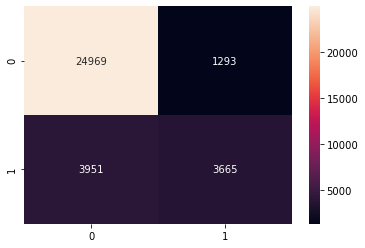

In [ ]:
#top left = True Positive
#top right = false positive
#bottom left = false negative
#bottom right = true negative

sns.heatmap(matrixBefore, annot = True, fmt = 'g')
plt.show()

Visualizing the confusion matrix in terms of percentages:

<AxesSubplot:>

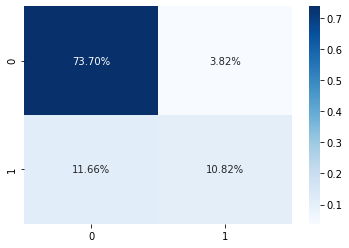

In [ ]:
sns.heatmap(matrixBefore/np.sum(matrixBefore), annot=True, fmt='.2%', cmap='Blues')

Calculating Accuracy:
* Formula for Accuracy: (TP + TN) / (TP + TN + FP+ FN)

In [ ]:
accuracyBefore = (matrixBefore[0, 0] + matrixBefore[1, 1])/matrixBefore[:, :].sum()
accuracyBefore

0.8452092803589351

###**After VIF**

In [ ]:
# Defining the dependent and independent columns
x = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

# Splitting x and y into test and train datasets:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
lr2 = LogisticRegression() # Creating an instance of the logistic regression model
lr2.fit(x_train, y_train) # Fitting/Training our model on our data

predicted_y = lr2.predict(x_test)  # Predicting whether there will be rain tomorrow
predicted_y

Creating a confusion matrix to evaluate our model's perfornance:

In [ ]:
matrix = metrics.confusion_matrix(y_test, predicted_y)
matrix

array([[25664,   598],
       [ 6620,   996]], dtype=int64)

Visualizing the confusion matrix in terms of integers:

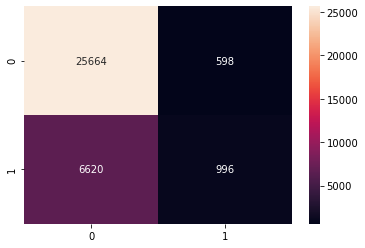

In [ ]:
#top left = True Positive
#top right = false positive
#bottom left = false negative
#bottom right = true negative
sns.heatmap(matrix, annot = True, fmt = 'g')
plt.show()

Visualizing the confusion matrix in terms of Percentages:

<AxesSubplot:>

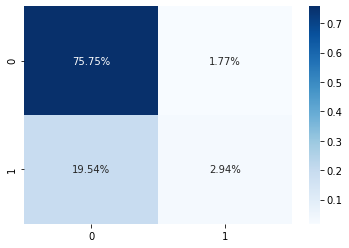

In [ ]:
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')

Calculating Accuracy:
* Formula for Accuracy: (TP + TN) / (TP + TN + FP+ FN)

In [ ]:
accuracy = (matrix[0, 0] + matrix[1, 1])/matrix[:, :].sum()
accuracy

0.7869413778853533

### **While tackling multicollinearity did not improve the overall accuracy of our models, it increased the percentage of true positives and decreased the percentage of false positives.**